In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

In [2]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
# CSV 파일 읽기
df = pd.read_csv('@점메추_제목_관련내용_게시자_게시날짜_20231125까지.csv')

# '내용' 컬럼의 텍스트 데이터 추출
text_data = ' '.join(df['내용'].astype(str))

In [5]:
# 텍스트 데이터 토크나이징
tokens = word_tokenize(text_data)

# 불용어 제거 (stopwords는 필요에 따라 적절히 추가 또는 수정)
stop_words = set(['는', '은', '이', '가', '을', '를', '하다', '에서', '으로', '에게', '와', '과', '의', "#", ','])
tokens = [word for word in tokens if word.lower() not in stop_words]

# 토큰화된 단어 확인
print(tokens)

['점메추', '용산점심메뉴추천', '용리단길맛집', '같이', '간', '친구가', '버팔로윙에서', '코스트코의', '향기가', '난다고', '하였고', '저는', '미쿡의', '스멜이', '느껴졌어요', '.', '저희는', '미쿡', '필라델피아에서', '처음', '만났다는', 'tmi', '.', '양이', '부족하면', '부리또나', '타코를', '추가할까했는데', '딱', '적당히', '먹었습니다', '....', '하루', '4시간만', '장사하는', '부대찌개', '집', '오늘의', '점메추는', '바로', '요기에요', '!', '도로지나가다', '길가에', '보여서', '드뎌', '와봤어요', '!', 'ㅎㅎ', '효심씨부대찌개', '광주첨단점', '광주', '북구', '금당마을길', '61-3', 'AM11:00-PM4:00', 'L/O15', '포장은', '16시까지', '가능해요', '!', '0507-1357-5262', '매장식사', '포장', '가능', '️', '주차도', '바로', '...', '하남모임장소', '하남점심메뉴', '하남점메추', '하남시래기조림', '하남코다리조림', '하남생선구이', '하남화덕구이생선', '하남생선화덕구이', '하남코다리조림맛집', '미사역맛집', '미사역생선구이', '미사역화덕구이', '미사역시래기맛집', '미사역데이트', 'O', '화', '정기휴무', '064-738-1841', '가게앞', '주차라인에', '주차', '가능', '내돈내산', '포함', '포스팅입니다', '중문맛집', '서귀포맛집', '서귀포일찍여는식당', '서귀포갈비탕', '서귀포소고기', '제주한우', '한우갈비탕잘하는집', '제주여행추천', '아방갈비', '중문단체회식', '중문조식추천', '저메추', '아침에', '일어나서', '죠스', '괴롭히는', '바예스', '•••', '..', '점메추', ':', '배떡', '엥', '메롱', '뭥', '미', '초중고', '생기부', '보는디', '준비물을', '빈틈

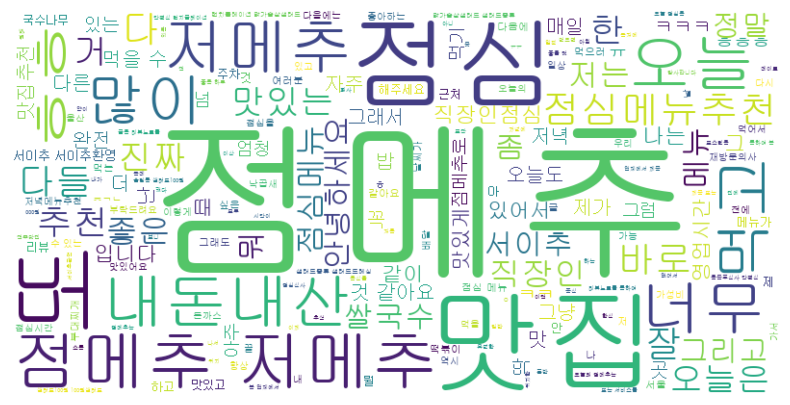

In [6]:
tokens_1 = " ".join(tokens)

# 워드클라우드 생성
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path = "C:/Windows/Fonts/NGULIM.TTF").generate(tokens_1)

# 한글 폰트 사용
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [10]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(tokens)

# TF-IDF 행렬을 데이터프레임으로 변환
df_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
df_tfidf.head(50)


,00,000,000원,000원을,0049,02,04,043,0507,06,...,힘난다버거,힘난다버거는,힘들더라구요,힘들어요,힘들지,힘없이,힘을,힘이,힙함이,힝구힝구
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# 워드클라우드 생성
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path = "C:/Windows/Fonts/NGULIM.TTF").generate(df_tfidf)

# 한글 폰트 사용
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

TypeError: expected string or bytes-like object, got 'DataFrame'

# 가중치 높은 단어의 포함여부
- 포함 O -> 시기 언제인지
- 포함 X -> 시기 언제인지

In [2]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

In [1]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
import pandas as pd

In [4]:
stopwords = ['가',
'가까스로',
'가령',
'각',
'각각',
'각자',
'각종',
'갖고말하자면',
'같다',
'같이',
'개의치않고',
'거니와',
'거바',
'거의',
'것',
'것과 같이',
'것들',
'게다가',
'게우다',
'겨우',
'견지에서',
'결과에 이르다',
'결국',
'결론을 낼 수 있다',
'겸사겸사',
'고려하면',
'고로',
'곧',
'공동으로',
'과',
'과연',
'관계가 있다',
'관계없이',
'관련이 있다',
'관하여',
'관한',
'관해서는',
'구',
'구체적으로',
'구토하다',
'그',
'그들',
'그때',
'그래',
'그래도',
'그래서',
'그러나',
'그러니',
'그러니까',
'그러면',
'그러므로',
'그러한즉',
'그런 까닭에',
'그런데',
'그런즉',
'그럼',
'그럼에도 불구하고',
'그렇게 함으로써',
'그렇지',
'그렇지 않다면',
'그렇지 않으면',
'그렇지만',
'그렇지않으면',
'그리고',
'그리하여',
'그만이다',
'그에 따르는',
'그위에',
'그저',
'그중에서',
'그치지 않다',
'근거로',
'근거하여',
'기대여',
'기점으로',
'기준으로',
'기타',
'까닭으로',
'까악',
'까지',
'까지 미치다',
'까지도',
'꽈당',
'끙끙',
'끼익',
'나',
'나머지는',
'남들',
'남짓',
'너',
'너희',
'너희들',
'네',
'넷',
'년',
'논하지 않다',
'놀라다',
'누가 알겠는가',
'누구',
'다른',
'다른 방면으로',
'다만',
'다섯',
'다소',
'다수',
'다시 말하자면',
'다시말하면',
'다음',
'다음에',
'다음으로',
'단지',
'답다',
'당신',
'당장',
'대로 하다',
'대하면',
'대하여',
'대해 말하자면',
'대해서',
'댕그',
'더구나',
'더군다나',
'더라도',
'더불어',
'더욱더',
'더욱이는',
'도달하다',
'도착하다',
'동시에',
'동안',
'된바에야',
'된이상',
'두번째로',
'둘',
'둥둥',
'뒤따라',
'뒤이어',
'든간에',
'들',
'등',
'등등',
'딩동',
'따라',
'따라서',
'따위',
'따지지 않다',
'딱',
'때',
'때가 되어',
'때문에',
'또',
'또한',
'뚝뚝',
'라 해도',
'령',
'로',
'로 인하여',
'로부터',
'로써',
'륙',
'를',
'마음대로',
'마저',
'마저도',
'마치',
'막론하고',
'만 못하다',
'만약',
'만약에',
'만은 아니다',
'만이 아니다',
'만일',
'만큼',
'말하자면',
'말할것도 없고',
'매',
'매번',
'메쓰겁다',
'몇',
'모',
'모두',
'무렵',
'무릎쓰고',
'무슨',
'무엇',
'무엇때문에',
'물론',
'및',
'바꾸어말하면',
'바꾸어말하자면',
'바꾸어서 말하면',
'바꾸어서 한다면',
'바꿔 말하면',
'바로',
'바와같이',
'밖에 안된다',
'반대로',
'반대로 말하자면',
'반드시',
'버금',
'보는데서',
'보다더',
'보드득',
'본대로',
'봐',
'봐라',
'부류의 사람들',
'부터',
'불구하고',
'불문하고',
'붕붕',
'비걱거리다',
'비교적',
'비길수 없다',
'비로소',
'비록',
'비슷하다',
'비추어 보아',
'비하면',
'뿐만 아니라',
'뿐만아니라',
'뿐이다',
'삐걱',
'삐걱거리다',
'사',
'삼',
'상대적으로 말하자면',
'생각한대로',
'설령',
'설마',
'설사',
'셋',
'소생',
'소인',
'솨',
'쉿',
'습니까',
'습니다',
'시각',
'시간',
'시작하여',
'시초에',
'시키다',
'실로',
'심지어',
'아',
'아니',
'아니나다를가',
'아니라면',
'아니면',
'아니었다면',
'아래윗',
'아무거나',
'아무도',
'아야',
'아울러',
'아이',
'아이고',
'아이구',
'아이야',
'아이쿠',
'아하',
'아홉',
'안 그러면',
'않기 위하여',
'않기 위해서',
'알 수 있다',
'알았어',
'앗',
'앞에서',
'앞의것',
'야',
'약간',
'양자',
'어',
'어기여차',
'어느',
'어느 년도',
'어느것',
'어느곳',
'어느때',
'어느쪽',
'어느해',
'어디',
'어때',
'어떠한',
'어떤',
'어떤것',
'어떤것들',
'어떻게',
'어떻해',
'어이',
'어째서',
'어쨋든',
'어쩔수 없다',
'어찌',
'어찌됏든',
'어찌됏어',
'어찌하든지',
'어찌하여',
'언제',
'언젠가',
'얼마',
'얼마 안 되는 것',
'얼마간',
'얼마나',
'얼마든지',
'얼마만큼',
'얼마큼',
'엉엉',
'에',
'에 가서',
'에 달려 있다',
'에 대해',
'에 있다',
'에 한하다',
'에게',
'에서',
'여',
'여기',
'여덟',
'여러분',
'여보시오',
'여부',
'여섯',
'여전히',
'여차',
'연관되다',
'연이서',
'영',
'영차',
'옆사람',
'예',
'예를 들면',
'예를 들자면',
'예컨대',
'예하면',
'오',
'오로지',
'오르다',
'오자마자',
'오직',
'오호',
'오히려',
'와',
'와 같은 사람들',
'와르르',
'와아',
'왜',
'왜냐하면',
'외에도',
'요만큼',
'요만한 것',
'요만한걸',
'요컨대',
'우르르',
'우리',
'우리들',
'우선',
'우에 종합한것과같이',
'운운',
'월',
'위에서 서술한바와같이',
'위하여',
'위해서',
'윙윙',
'육',
'으로',
'으로 인하여',
'으로서',
'으로써',
'을',
'응',
'응당',
'의',
'의거하여',
'의지하여',
'의해',
'의해되다',
'의해서',
'이',
'이 되다',
'이 때문에',
'이 밖에',
'이 외에',
'이 정도의',
'이것',
'이곳',
'이때',
'이라면',
'이래',
'이러이러하다',
'이러한',
'이런',
'이럴정도로',
'이렇게 많은 것',
'이렇게되면',
'이렇게말하자면',
'이렇구나',
'이로 인하여',
'이르기까지',
'이리하여',
'이만큼',
'이번',
'이봐',
'이상',
'이어서',
'이었다',
'이와 같다',
'이와 같은',
'이와 반대로',
'이와같다면',
'이외에도',
'이용하여',
'이유만으로',
'이젠',
'이지만',
'이쪽',
'이천구',
'이천육',
'이천칠',
'이천팔',
'인 듯하다',
'인젠',
'일',
'일것이다',
'일곱',
'일단',
'일때',
'일반적으로',
'일지라도',
'임에 틀림없다',
'입각하여',
'입장에서',
'잇따라',
'있다',
'자',
'자기',
'자기집',
'자마자',
'자신',
'잠깐',
'잠시',
'저',
'저것',
'저것만큼',
'저기',
'저쪽',
'저희',
'전부',
'전자',
'전후',
'점에서 보아',
'정도에 이르다',
'제',
'제각기',
'제외하고',
'조금',
'조차',
'조차도',
'졸졸',
'좀',
'좋아',
'좍좍',
'주룩주룩',
'주저하지 않고',
'줄은 몰랏다',
'줄은모른다',
'중에서',
'중의하나',
'즈음하여',
'즉',
'즉시',
'지든지',
'지만',
'지말고',
'진짜로',
'쪽으로',
'차라리',
'참',
'참나',
'첫번째로',
'쳇',
'총적으로',
'총적으로 말하면',
'총적으로 보면',
'칠',
'콸콸',
'쾅쾅',
'쿵',
'타다',
'타인',
'탕탕',
'토하다',
'통하여',
'툭',
'퉤',
'틈타',
'팍',
'팔',
'퍽',
'펄렁',
'하',
'하게될것이다',
'하게하다',
'하겠는가',
'하고 있다',
'하고있었다',
'하곤하였다',
'하구나',
'하기 때문에',
'하기 위하여',
'하기는한데',
'하기만 하면',
'하기보다는',
'하기에',
'하나',
'하느니',
'하는 김에',
'하는 편이 낫다',
'하는것도',
'하는것만 못하다',
'하는것이 낫다',
'하는바',
'하더라도',
'하도다',
'하도록시키다',
'하도록하다',
'하든지',
'하려고하다',
'하마터면',
'하면 할수록',
'하면된다',
'하면서',
'하물며',
'하여금',
'하여야',
'하자마자',
'하지 않는다면',
'하지 않도록',
'하지마',
'하지마라',
'하지만',
'하하',
'한 까닭에',
'한 이유는',
'한 후',
'한다면',
'한다면 몰라도',
'한데',
'한마디',
'한적이있다',
'한켠으로는',
'한항목',
'할 따름이다',
'할 생각이다',
'할 줄 안다',
'할 지경이다',
'할 힘이 있다',
'할때',
'할만하다',
'할망정',
'할뿐',
'할수있다',
'할수있어',
'할줄알다',
'할지라도',
'할지언정',
'함께',
'해도된다',
'해도좋다',
'해봐요',
'해서는 안된다',
'해야한다',
'해요',
'했어요',
'향하다',
'향하여',
'향해서',
'허',
'허걱',
'허허',
'헉',
'헉헉',
'헐떡헐떡',
'형식으로 쓰여',
'혹시',
'혹은',
'혼자',
'훨씬',
'휘익',
'휴',
'흐흐',
'흥',
'힘입어']

In [5]:
len(stopwords)

595

In [6]:
from konlpy.tag import Okt

def okt_tokenizer(text, return_nouns_only=True):
    """ 
    input: korean text
    output: tokens
    
    if return_nouns_only option is True, only nouns will be extracted.
    """
    okt = Okt()
    
    if return_nouns_only:
        tokens = okt.nouns(text)
    else:
        tokens = okt.morphs(text)
    
    # you can refer to the site below that lists Korean stopwords
    # https://www.ranks.nl/stopwords/korean
    #stopwords = ['입니다', '은', '는', '이', '가', '이거', '저거', '그거', '여기', '이쪽', ]
    tokens = [n for n in tokens if n not in stopwords]
    return tokens

In [8]:
df = pd.read_csv('@많관부_제목_관련내용_게시자_게시날짜_20231125까지.csv')
df

,제목,내용,게시자,게시날짜
0,가장 넓은 길은 언제나 내 마음속에,"서울의봄많관부(절찬상영중) 사랑한다고말해줘많관부(디플,지니티비,ENA) 라우브야.....",가끔 누군가 나를 기록해줬으면 좋겠다는 생각을 한다,1일 전
1,레터프롬문 영등포 타임스퀘어 팝업 겨울신상 블프세일 착샷 피팅 후기,시어링 점퍼도 함께 피팅 했는데 따뜻하니 포근하더라구요 >_< 다양한 이벤트가 많은...,RUMI's Fashion life,1일 전
2,경상남도 사천시 삼천포 갑오징어 선상낚시 [팔포항 건담호] 2023.11.12,없이 한 번 만들어 봐쓰요 ㅋㅋㅋㅋ 냠냠 이상 삼천포 건담호 조행기를 마칩니다~ 다...,앵환,1일 전
3,[농사왓수] 농부딸 수이수이 시골 왓수!,농사알못 농부딸..^.^ 점점 더 잘 알아가보도록 할게요 아직 잘 몰라서 배추 상할...,이수 여기있수?,1일 전
4,(인스타그램)가수님인스타스토리♥️♥️♥️,이해한다는 말 Understanding 3. 쓰여진 편지 위로 Written Let...,치열스 황치열팬카페(Hwang Chiyeul Fan Cafe),1일 전
...,...,...,...,...
444,거상거상 많관부 플리뚜 ㅠ,판다 팔림 날물로 돼지 모두다 해서 악콘 가언불입니다 일반 분들이 글을 잘 못읽나보네요,로블록스 입양하세요,2023.09.30.
445,Spirits 클원 모집중입니다,클전 방학기간에만 합니다. 아주 화목하고 즐겜클인 스피릿 초보도 들어올수있어요! 면...,밀크초코 온라인 FPS - 밀초온,2023.09.30.
446,9/30 오늘 런던 동행 구해요~~,30일 일정 다 비어있어서 가시고 싶은데 가셔도 될것같아요~~ (프림로즈 힐에서 선...,[유랑]유럽여행의든든한동반자,2023.09.30.
447,레인보우 이벤트(?),어..음... 레인보우 이벤트(?) 에여(제가 걍 지은거예여) 왼쪽을 배경으로 할거...,백앤아와 비엔나군단,2023.09.30.


In [9]:
df = df.drop(['제목', '게시자', '게시날짜'], axis=1)
df

,내용
0,"서울의봄많관부(절찬상영중) 사랑한다고말해줘많관부(디플,지니티비,ENA) 라우브야....."
1,시어링 점퍼도 함께 피팅 했는데 따뜻하니 포근하더라구요 >_< 다양한 이벤트가 많은...
2,없이 한 번 만들어 봐쓰요 ㅋㅋㅋㅋ 냠냠 이상 삼천포 건담호 조행기를 마칩니다~ 다...
3,농사알못 농부딸..^.^ 점점 더 잘 알아가보도록 할게요 아직 잘 몰라서 배추 상할...
4,이해한다는 말 Understanding 3. 쓰여진 편지 위로 Written Let...
...,...
444,판다 팔림 날물로 돼지 모두다 해서 악콘 가언불입니다 일반 분들이 글을 잘 못읽나보네요
445,클전 방학기간에만 합니다. 아주 화목하고 즐겜클인 스피릿 초보도 들어올수있어요! 면...
446,30일 일정 다 비어있어서 가시고 싶은데 가셔도 될것같아요~~ (프림로즈 힐에서 선...
447,어..음... 레인보우 이벤트(?) 에여(제가 걍 지은거예여) 왼쪽을 배경으로 할거...


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=okt_tokenizer)
X = vectorizer.fit_transform(df['내용'])
df_X = pd.DataFrame(X.todense(), columns=vectorizer.get_feature_names_out())
df_X

C:\Users\01wkd\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,가게,가격,가기,가끔,가능,가능성,가다가,가도,가득,가디건,...,히히히,힉힉,힌지,힐,힐링,힘,힘둘,힘드름,힙스터,힝구
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.152563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
445,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
446,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.233197,0.0,0.0,0.0,0.0,0.0,0.0
447,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
selected_columns = df_X.columns[(df_X > 0.5).any()]

df_selected = df_X[selected_columns]

# 결과 확인
df_selected

,감자탕,강의,갤러리,거래,건강,게임,고기국수,골상,공감,관부,...,패셔,팩,핸드폰,허니문,헬멧,혜진,화수,환영,황매산,휴게소
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.087236,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.070522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.081671,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.050126,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.054156,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# DataFrame의 열 이름을 리스트로 추출
column_names = df_selected.columns.tolist()

# 결과 출력
print(column_names)

['가야', '간편식', '건', '걸작', '경자', '고급', '고기', '고백', '고요', '구라', '구매', '국물', '국밥', '국수나무', '굿', '규동', '금지', '기온', '길동', '김밥', '꿀맛', '나영', '낙곱새', '날', '낭', '내일', '널널', '는걸', '님들', '다가', '단체', '담', '대국', '댓글', '도겸', '도장', '돈까스', '돈까쓰', '돈꿈', '동참', '동태', '된장찌개', '등장', '따땃하', '떵글', '뜻', '리뷰', '마두역', '맛', '맛집', '매장', '머', '메뉴', '메추리', '못', '못정', '무대', '무실동', '물회', '뭐', '뭘', '미니', '미트파이', '민속', '밀가루', '바', '바위', '박물관', '반말', '반월당', '밥', '밥집', '방문', '배달', '버거', '복직', '볶음', '부산', '분', '분명', '비빔밥', '비주', '뿌링란', '사람', '사진', '상암', '샐러드', '생', '생크림', '서면', '설렁탕', '세상', '센텀', '소문', '솔솔', '순위', '식단', '신도림', '신참', '쌀국수', '아시', '아울렛', '아저씨', '안', '안녕', '안동', '압구정', '앞', '약', '양념', '양식', '어두운', '어만두', '어캐해', '어플', '얼', '에버랜드', '여러가지', '여주', '예약', '예전', '예정', '오빠', '오차즈케', '왓어', '왜냐면', '욤', '용', '운전면허', '월급', '월드', '위치', '위해', '유부', '육개장', '이이이이', '이인', '인분', '인붘', '자고', '장', '적립금', '전골', '전복', '전현무', '점', '점메', '점메추', '점메추점', '점메추좀', '점심', '정', '정독', '조명', '족발', '종로', '주차장', '중식', '진짜', '징', '쭈꾸미', '쭉', '찌

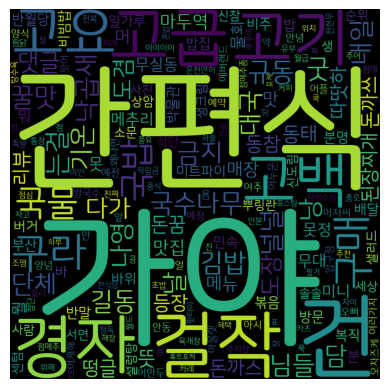

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(column_names) # all text documents in one string
wc = WordCloud(font_path='NanumSquareRoundR.ttf', width=800, height=800, max_words=500).generate(text)
plt.imshow(wc)
plt.axis("off")
plt.show()